# Stats on UW1 level design

## Loading files

In [1]:
from pathlib import Path
import skimage as sk
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [2]:
image_paths = list(Path('.').glob('*.bmp'))
image_paths

[WindowsPath('map0.bmp'),
 WindowsPath('map1.bmp'),
 WindowsPath('map2.bmp'),
 WindowsPath('map3.bmp'),
 WindowsPath('map4.bmp'),
 WindowsPath('map5.bmp'),
 WindowsPath('map6.bmp'),
 WindowsPath('map7.bmp')]

In [3]:
def load_indexed_bmp(image_path, lut):
    img = sk.io.imread(image_path)
    indexed = []
    for pxl in img.reshape(-1, 1, 3):
        indexed.append(lut.index(tuple(pxl.flatten().tolist())))
    return np.array(indexed, dtype='uint8').reshape(64, 64)

In [4]:
lut = []
with Path('./glasbey.lut').open('rb') as fp:
    for _ in range(256):
        r = int.from_bytes(fp.read(1))
        g = int.from_bytes(fp.read(1))
        b = int.from_bytes(fp.read(1))
        lut.append((r,g,b))

In [5]:
images = [load_indexed_bmp(i, lut) for i in image_paths]

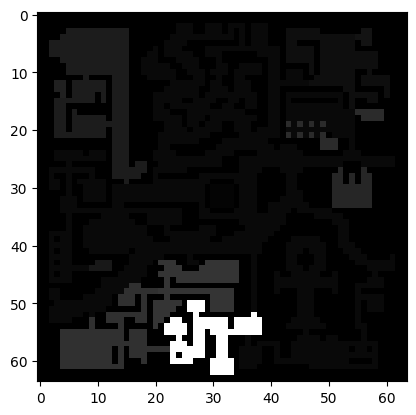

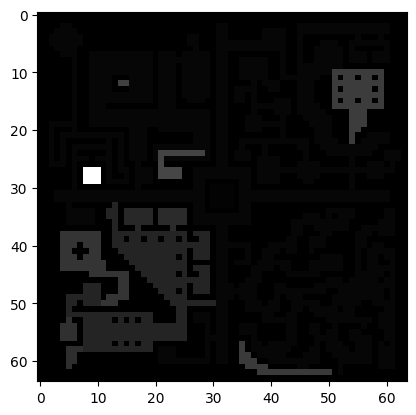

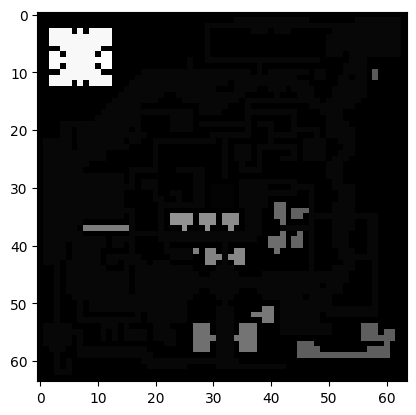

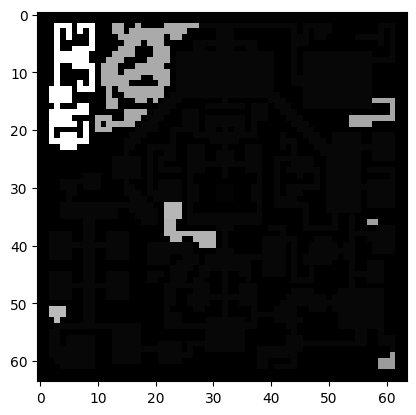

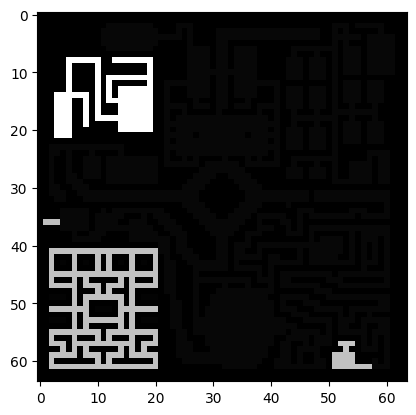

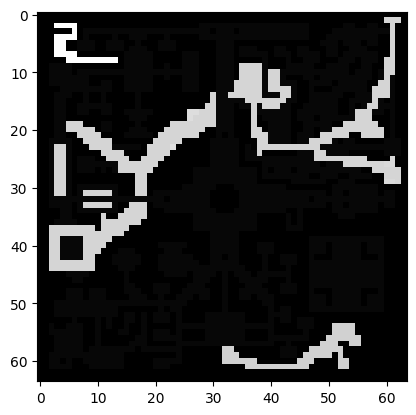

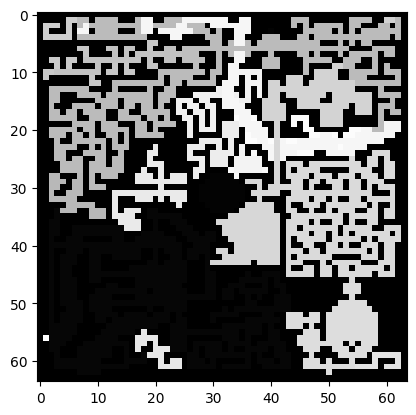

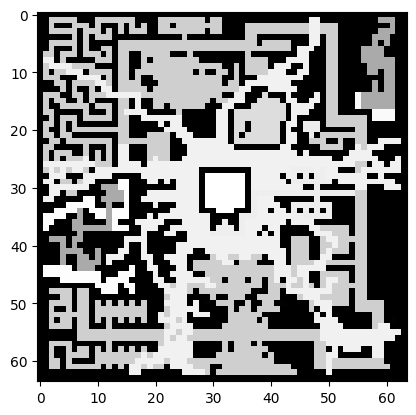

In [6]:
for image in images:
    plt.figure()
    plt.imshow(image/255, cmap='gray')

In [ ]:
stack = np.dstack(images)

(64, 64, 8)

In [31]:
for val in np.unique(stack):
    print(val, np.sum(stack == val) / stack.size * 100)

0 49.6185302734375
1 0.384521484375
2 30.1544189453125
3 0.37841796875
4 0.0213623046875
5 0.0213623046875
6 0.689697265625
7 0.0152587890625
8 0.1220703125
9 0.0701904296875
10 0.3875732421875
11 0.2655029296875
12 0.830078125
13 0.048828125
14 0.048828125
15 0.0244140625
16 0.030517578125
17 0.201416015625
19 0.0732421875
20 0.20751953125
21 0.006103515625
22 0.0274658203125
23 0.0274658203125
24 0.006103515625
25 0.128173828125
26 0.0152587890625
27 0.0152587890625
28 0.0213623046875
29 0.0244140625
30 0.048828125
31 0.048828125
32 0.0244140625
33 0.0244140625
34 0.0030517578125
35 0.0213623046875
36 0.0213623046875
37 0.0213623046875
38 0.0213623046875
39 0.0274658203125
40 0.0213623046875
41 0.006103515625
43 0.054931640625
44 0.3875732421875
45 0.0274658203125
46 0.067138671875
47 0.0274658203125
48 0.0213623046875
49 0.0091552734375
50 0.6927490234375
51 0.01220703125
53 0.286865234375
54 0.18310546875
55 1.1383056640625
56 0.0152587890625
57 0.0091552734375
58 0.0030517578125
5

In [141]:
for i, layer in enumerate(images):
    unique = np.unique(layer)
    print('Level', i + 1, 'has', len(unique), 'zones')
    nonzero = (layer != 0).sum()
    print(f'\t Walls: {100 - nonzero / layer.size * 100:.2f}% walls.     Not-walls {nonzero / layer.size * 100:<6.2f}% ')
    print('\t' + '-'*56)
    print('\t Label         count % total    % total, excluding walls')
    print('\t' + '-'*56)
    print(f'\t Inaccessible: {np.sum(layer == 1):<5} {np.sum(layer == 1) / layer.size * 100:<6.2f} {np.sum(layer == 1) / nonzero * 100:>8.2f}')
    counts = np.array([np.sum(layer == u) for u in unique])
    idxs = np.argsort(counts)[::-1]
    sorted_counts = counts[idxs]
    sortes_labels = unique[idxs]
    for c, l in zip(sorted_counts, sortes_labels):
        if l == 0 or l == 1:
            continue
        pct1 = f'{np.sum(layer == l) / layer.size * 100:<5.2f}'
        print(f'\t {l:<13} {np.sum(layer == l):<5} {pct1:<10} {np.sum(layer == l) / nonzero * 100:.2f}')

        
    # for u in unique:
    #     if u == 0 or u == 1:
    #         continue
    #     else:
    #         pct1 = f'{np.sum(layer == u) / layer.size * 100:<5.2f}'
    #         print(f'\t {u:<13} {pct1:<10} {np.sum(layer == u) / nonzero * 100:.2f}')

Level 1 has 13 zones
	 Walls: 50.29% walls.     Not-walls 49.71 % 
	--------------------------------------------------------
	 Label         count % total    % total, excluding walls
	--------------------------------------------------------
	 Inaccessible: 16    0.39       0.79
	 2             1280  31.25      62.87
	 6             226   5.52       11.10
	 10            127   3.10       6.24
	 3             124   3.03       6.09
	 53            94    2.29       4.62
	 11            87    2.12       4.27
	 8             40    0.98       1.96
	 9             23    0.56       1.13
	 5             7     0.17       0.34
	 4             7     0.17       0.34
	 7             5     0.12       0.25
Level 2 has 15 zones
	 Walls: 51.29% walls.     Not-walls 48.71 % 
	--------------------------------------------------------
	 Label         count % total    % total, excluding walls
	--------------------------------------------------------
	 Inaccessible: 16    0.39       0.80
	 2             1470  

In [144]:
for i, layer in enumerate(images):
    unique = np.unique(layer)
    print('Level', i + 1, 'has', len(unique), 'zones')
    nonzero = (layer != 0).sum()
    print(f'\t Walls: {100 - nonzero / layer.size * 100:.2f}% walls.     Not-walls {nonzero / layer.size * 100:<6.2f}% ')
    print('\t' + '-'*56)
    print('\t Label         count % total    % total, excluding walls')
    print('\t' + '-'*56)
    print(f'\t Inaccessible: {np.sum(layer == 1):<5} {np.sum(layer == 1) / layer.size * 100:<6.2f} {np.sum(layer == 1) / nonzero * 100:>8.2f}')
    for u in unique:
        if u == 0 or u == 1:
            continue
        else:
            pct1 = f'{np.sum(layer == u) / layer.size * 100:<5.2f}'
            print(f'\t {u:<13} {np.sum(layer == u):<5} {pct1:<10} {np.sum(layer == u) / nonzero * 100:.2f}')

Level 1 has 13 zones
	 Walls: 50.29% walls.     Not-walls 49.71 % 
	--------------------------------------------------------
	 Label         count % total    % total, excluding walls
	--------------------------------------------------------
	 Inaccessible: 16    0.39       0.79
	 2             1280  31.25      62.87
	 3             124   3.03       6.09
	 4             7     0.17       0.34
	 5             7     0.17       0.34
	 6             226   5.52       11.10
	 7             5     0.12       0.25
	 8             40    0.98       1.96
	 9             23    0.56       1.13
	 10            127   3.10       6.24
	 11            87    2.12       4.27
	 53            94    2.29       4.62
Level 2 has 15 zones
	 Walls: 51.29% walls.     Not-walls 48.71 % 
	--------------------------------------------------------
	 Label         count % total    % total, excluding walls
	--------------------------------------------------------
	 Inaccessible: 16    0.39       0.80
	 2             1470  

In [164]:
for u in np.unique(stack):
    n = np.sum(np.sum(stack == u, axis=1), axis=0) != 0
    print(u, ':', ','.join(map(str, np.arange(1, 9)[n])), sep='')

0:1,2,3,4,5,6,7,8
1:1,2,3,4,5,7,8
2:1,2,3,4,5,6,7
3:1
4:1
5:1
6:1
7:1
8:1
9:1
10:1
11:1
12:2
13:2
14:2
15:2
16:2
17:2
19:2
20:2
21:2
22:2
23:2
24:3
25:3
26:3
27:3
28:3
29:3
30:3
31:3
32:3
33:3
34:3
35:3
36:3
37:3
38:3
39:3
40:4
41:4
43:4
44:4
45:4
46:4
47:4
48:4
49:5
50:5
51:5
53:1
54:6
55:6
56:6
57:6
58:6
59:7
60:7,8
61:7
62:7
63:7
64:7
65:7
66:3,4,5,6,7
67:3,7
68:3,7
69:7
70:7
71:7
73:7,8
74:7
75:7
76:7
77:7
78:7,8
79:7
80:7
81:7
82:7
83:2,8
84:8
85:8
88:8
89:8
90:8


In [176]:
spans_levels = []
for u in np.unique(stack):
    n = np.sum(np.sum(stack == u, axis=1), axis=0) != 0
    if np.sum(n) > 1:
        print(u, ':', ','.join(map(str, np.arange(1, 9)[n])), sep='')
        spans_levels.append(u)

0:1,2,3,4,5,6,7,8
1:1,2,3,4,5,7,8
2:1,2,3,4,5,6,7
60:7,8
66:3,4,5,6,7
67:3,7
68:3,7
73:7,8
78:7,8
83:2,8


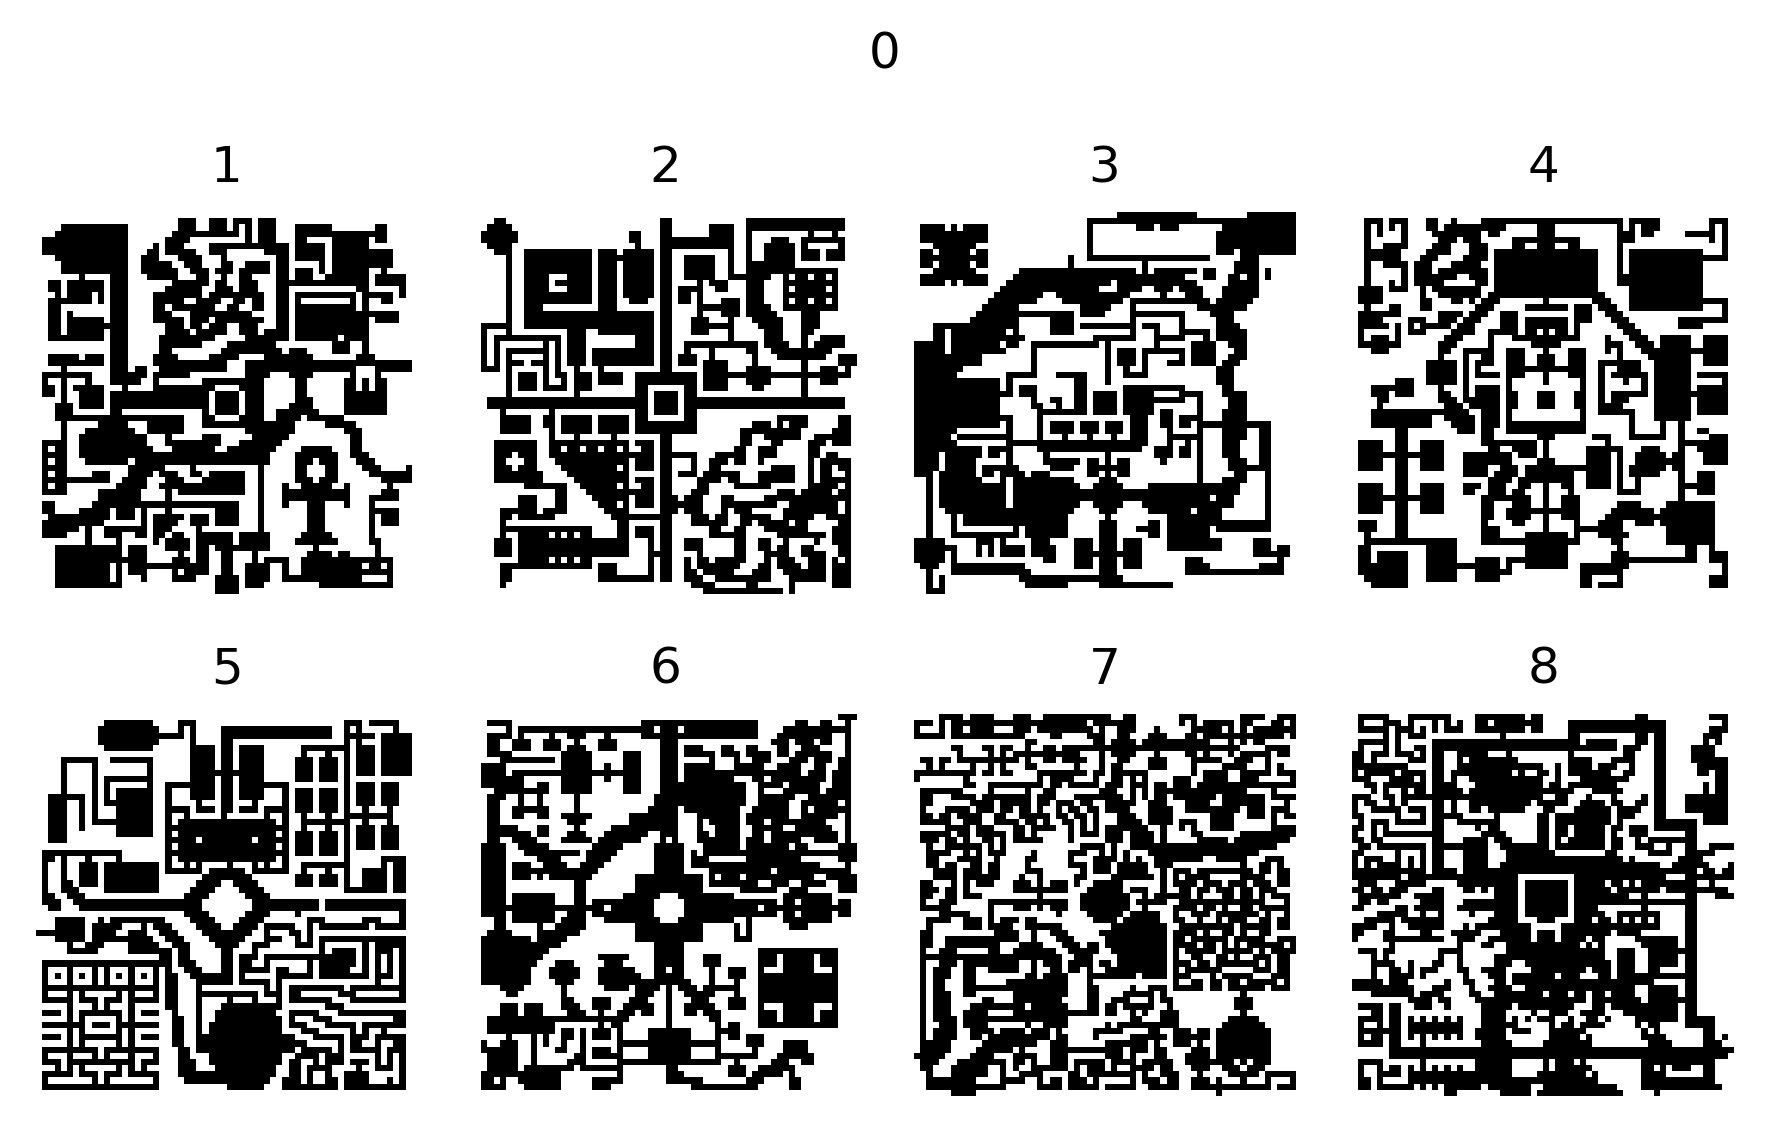

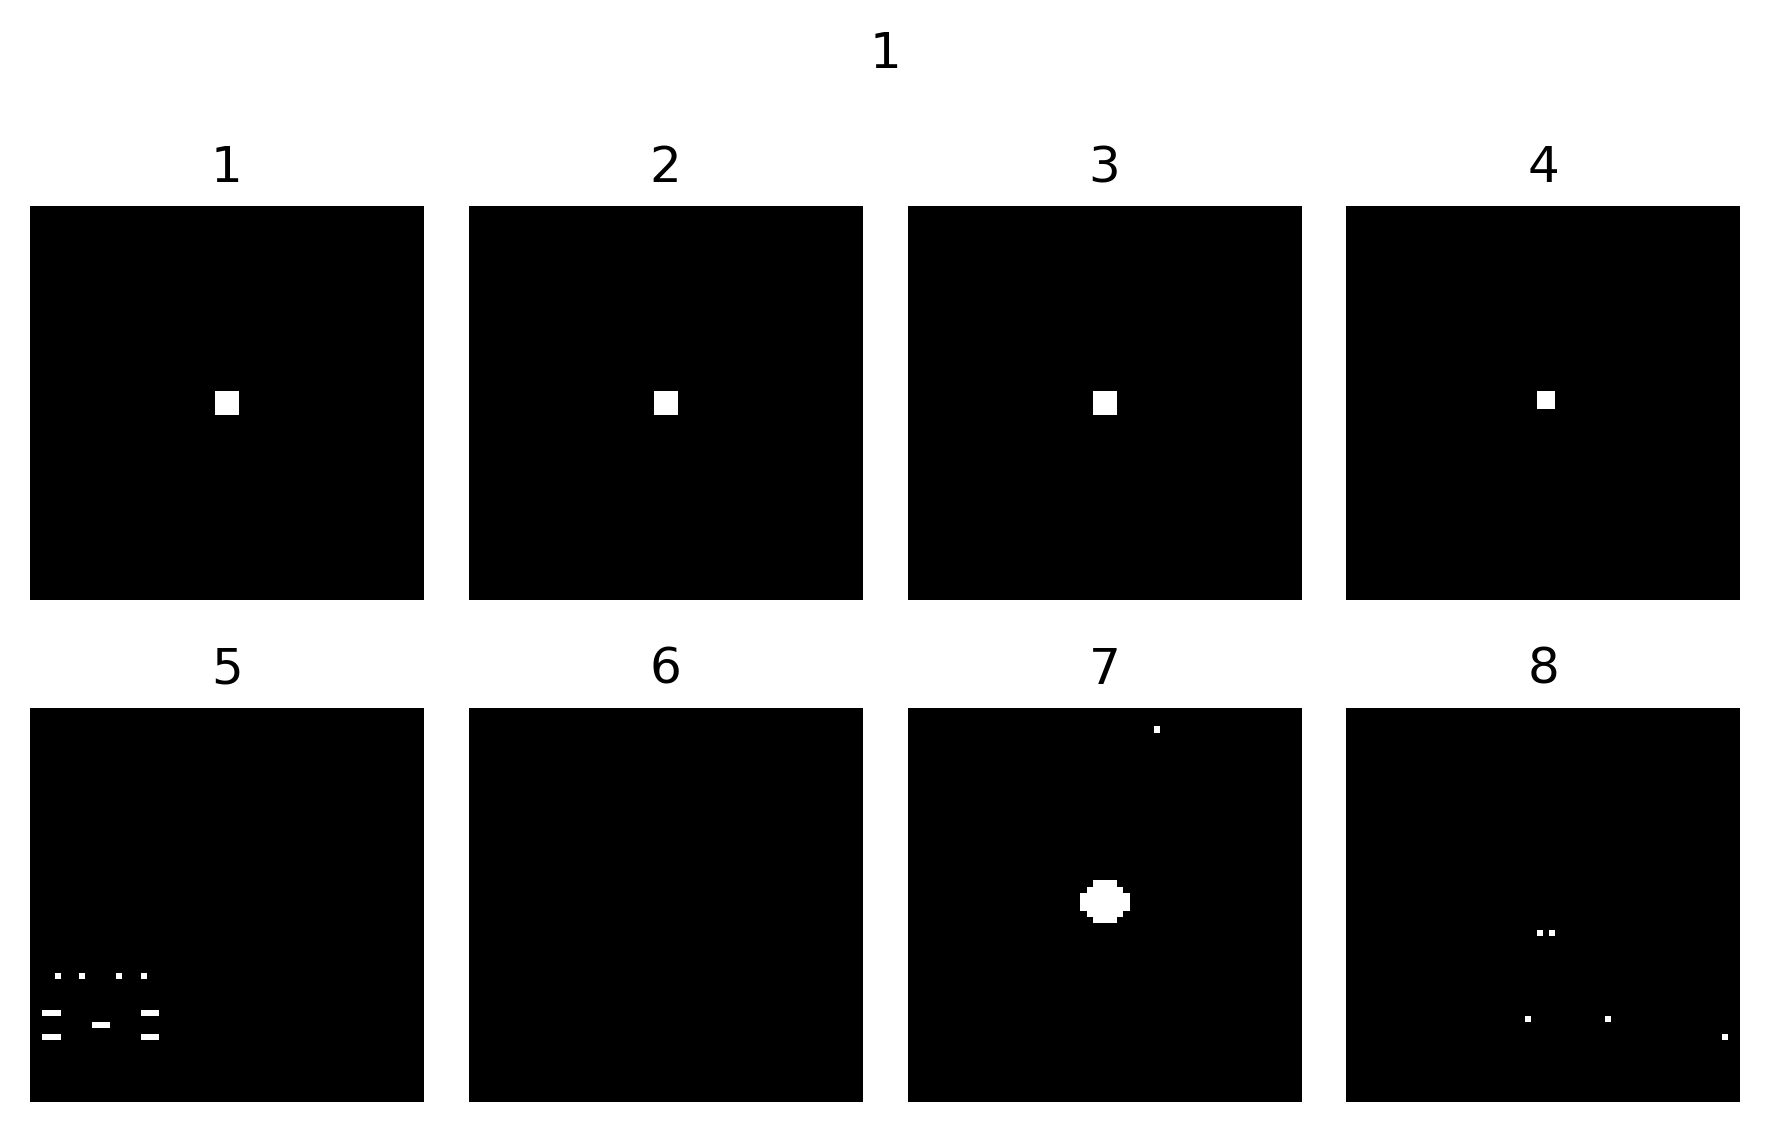

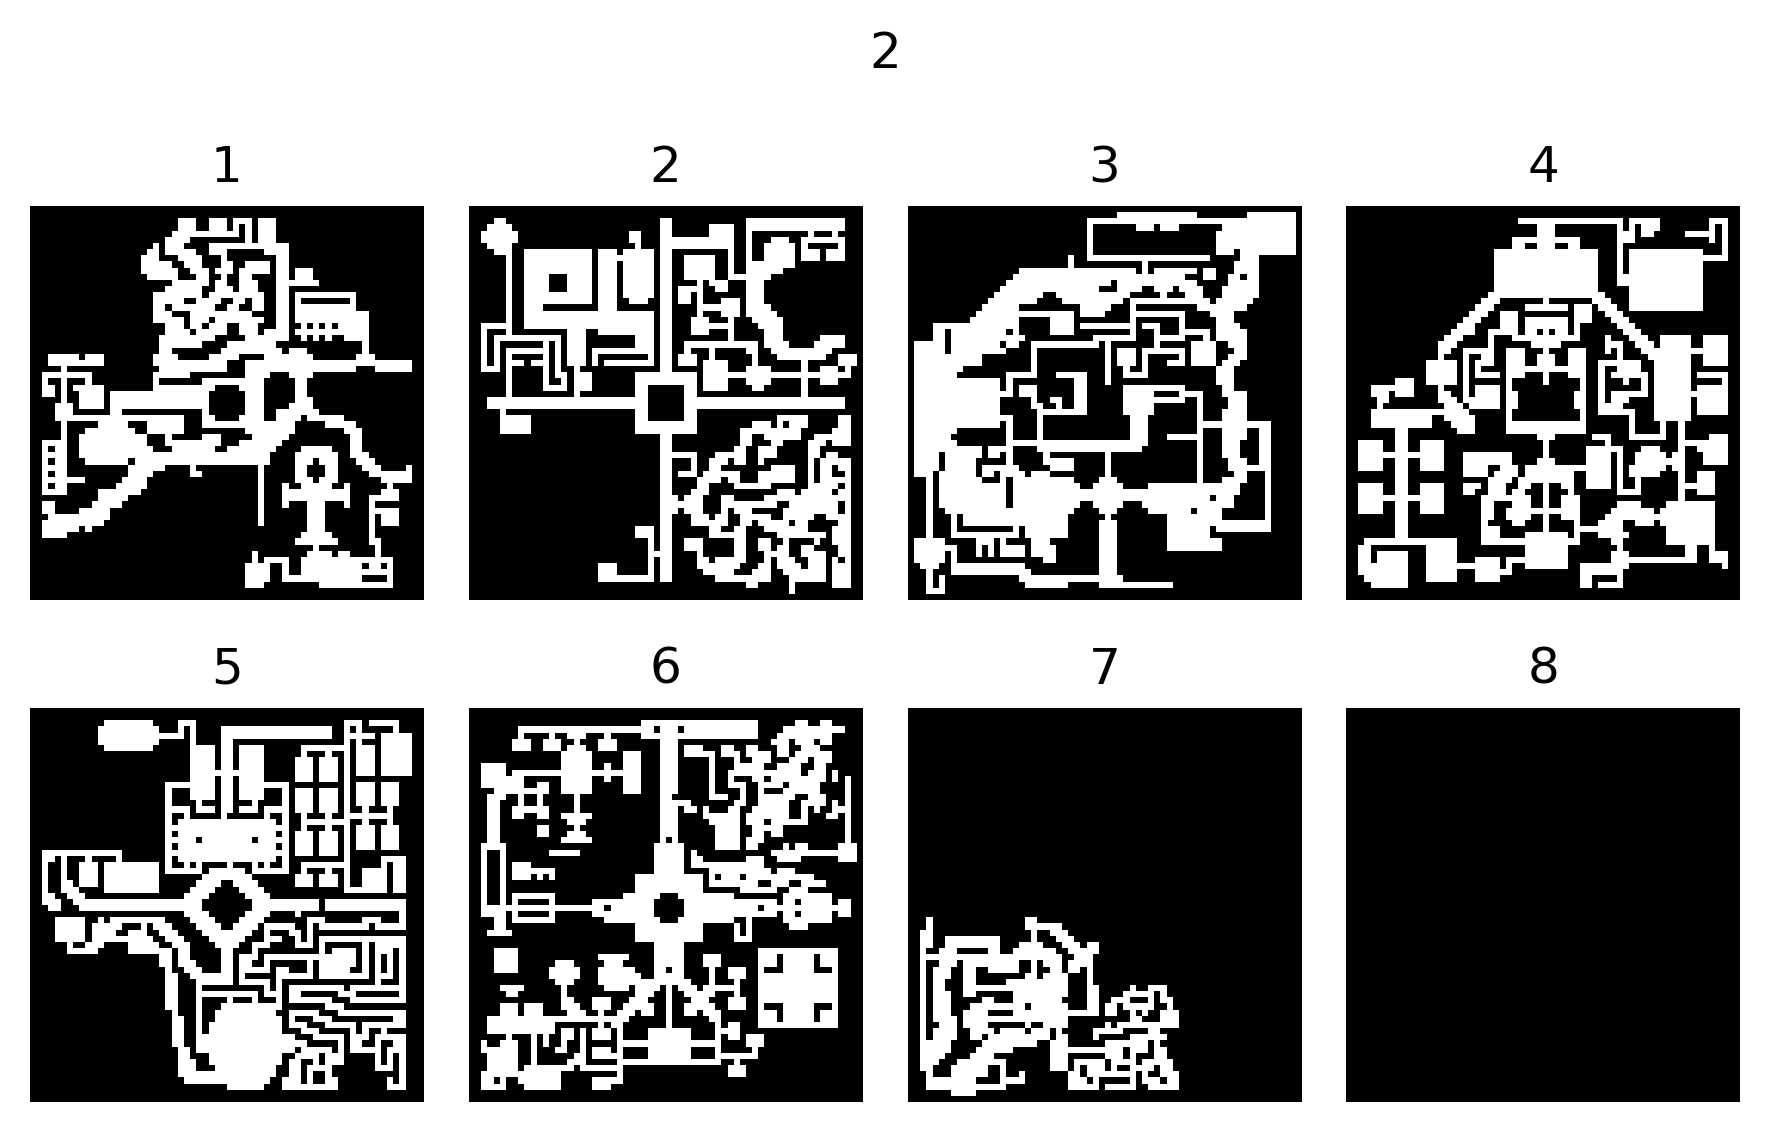

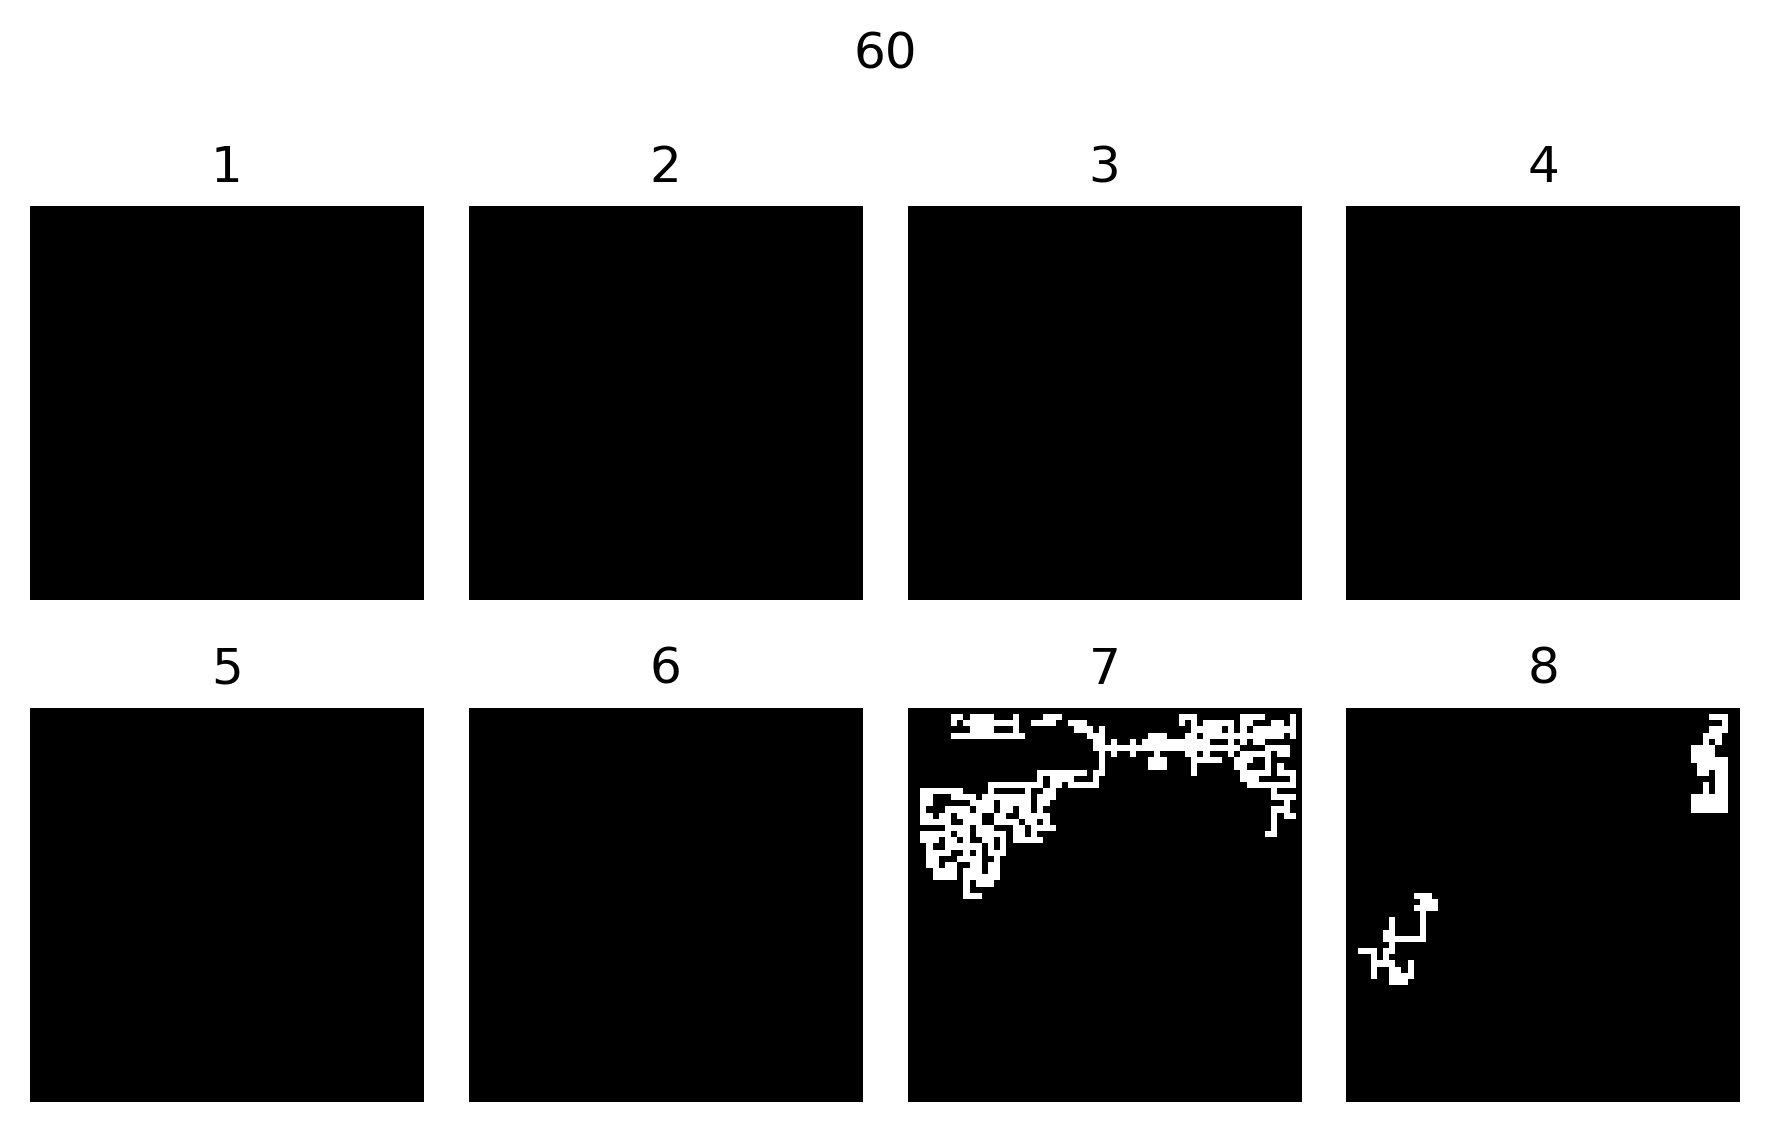

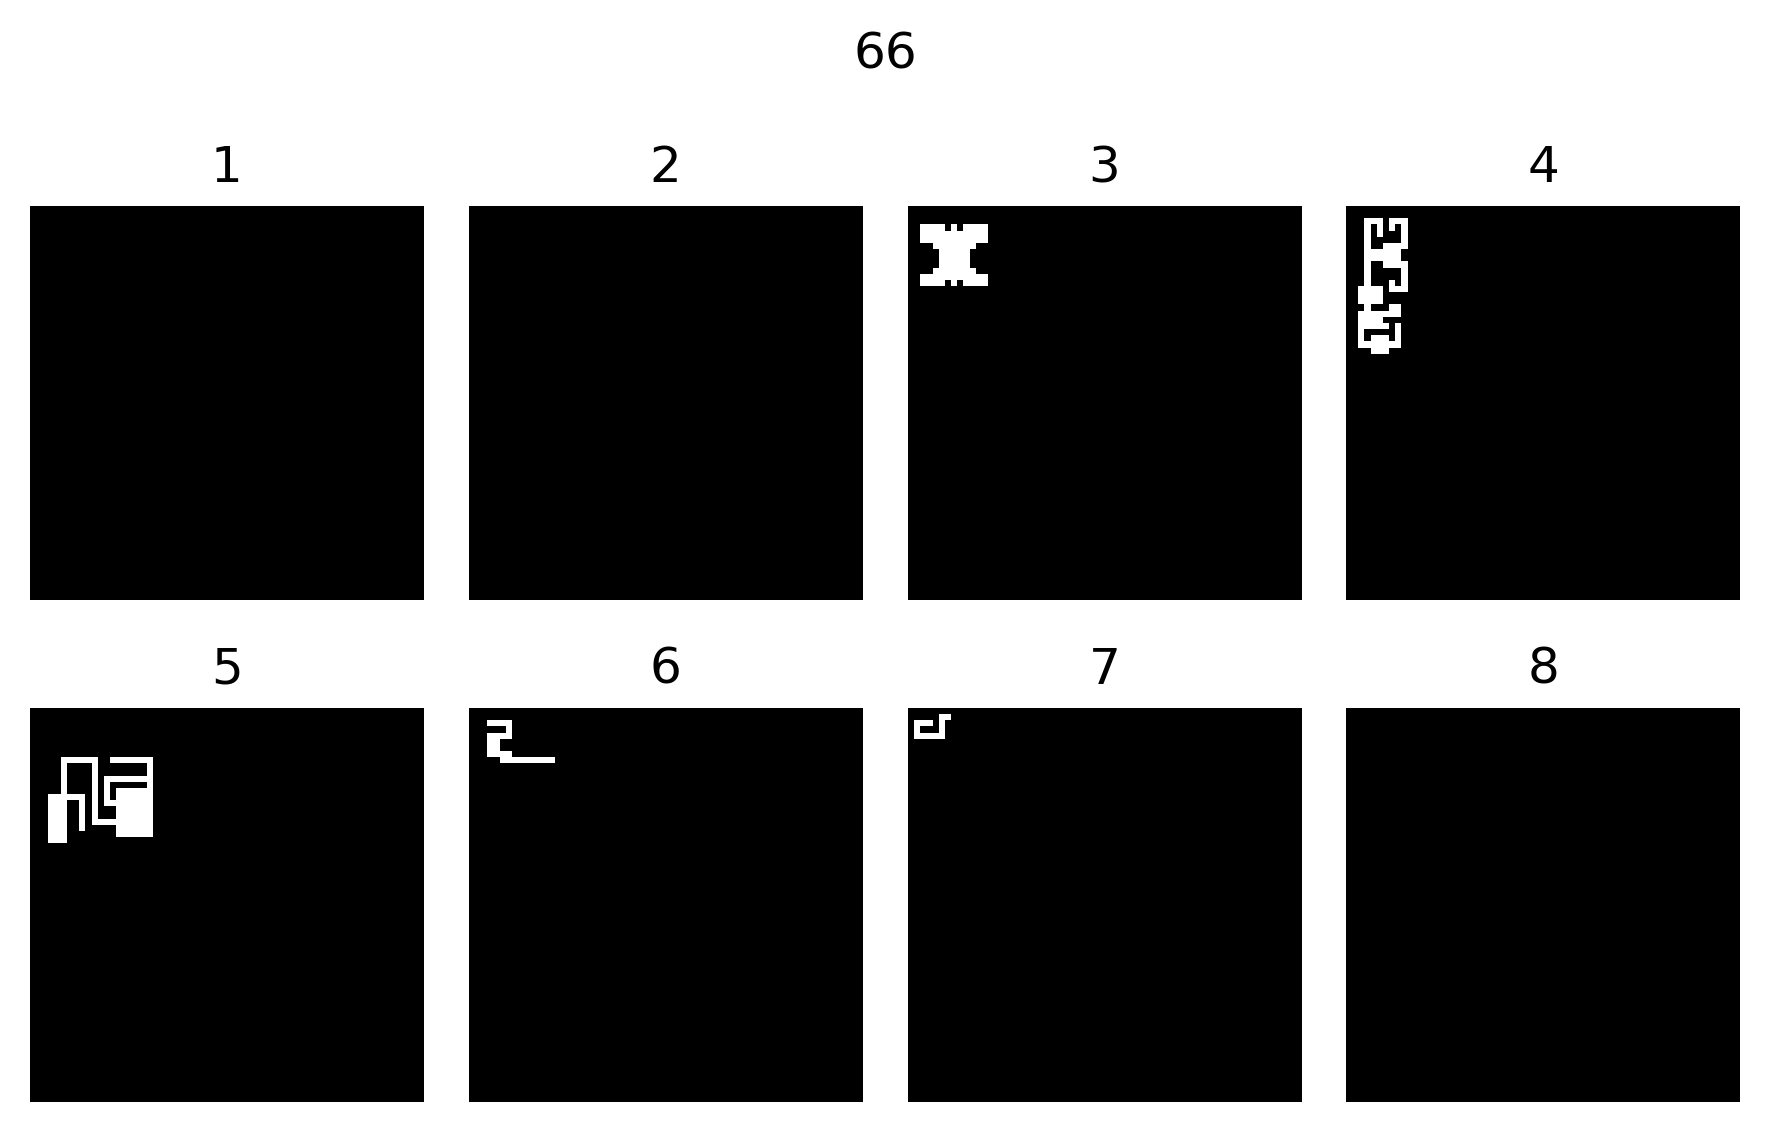

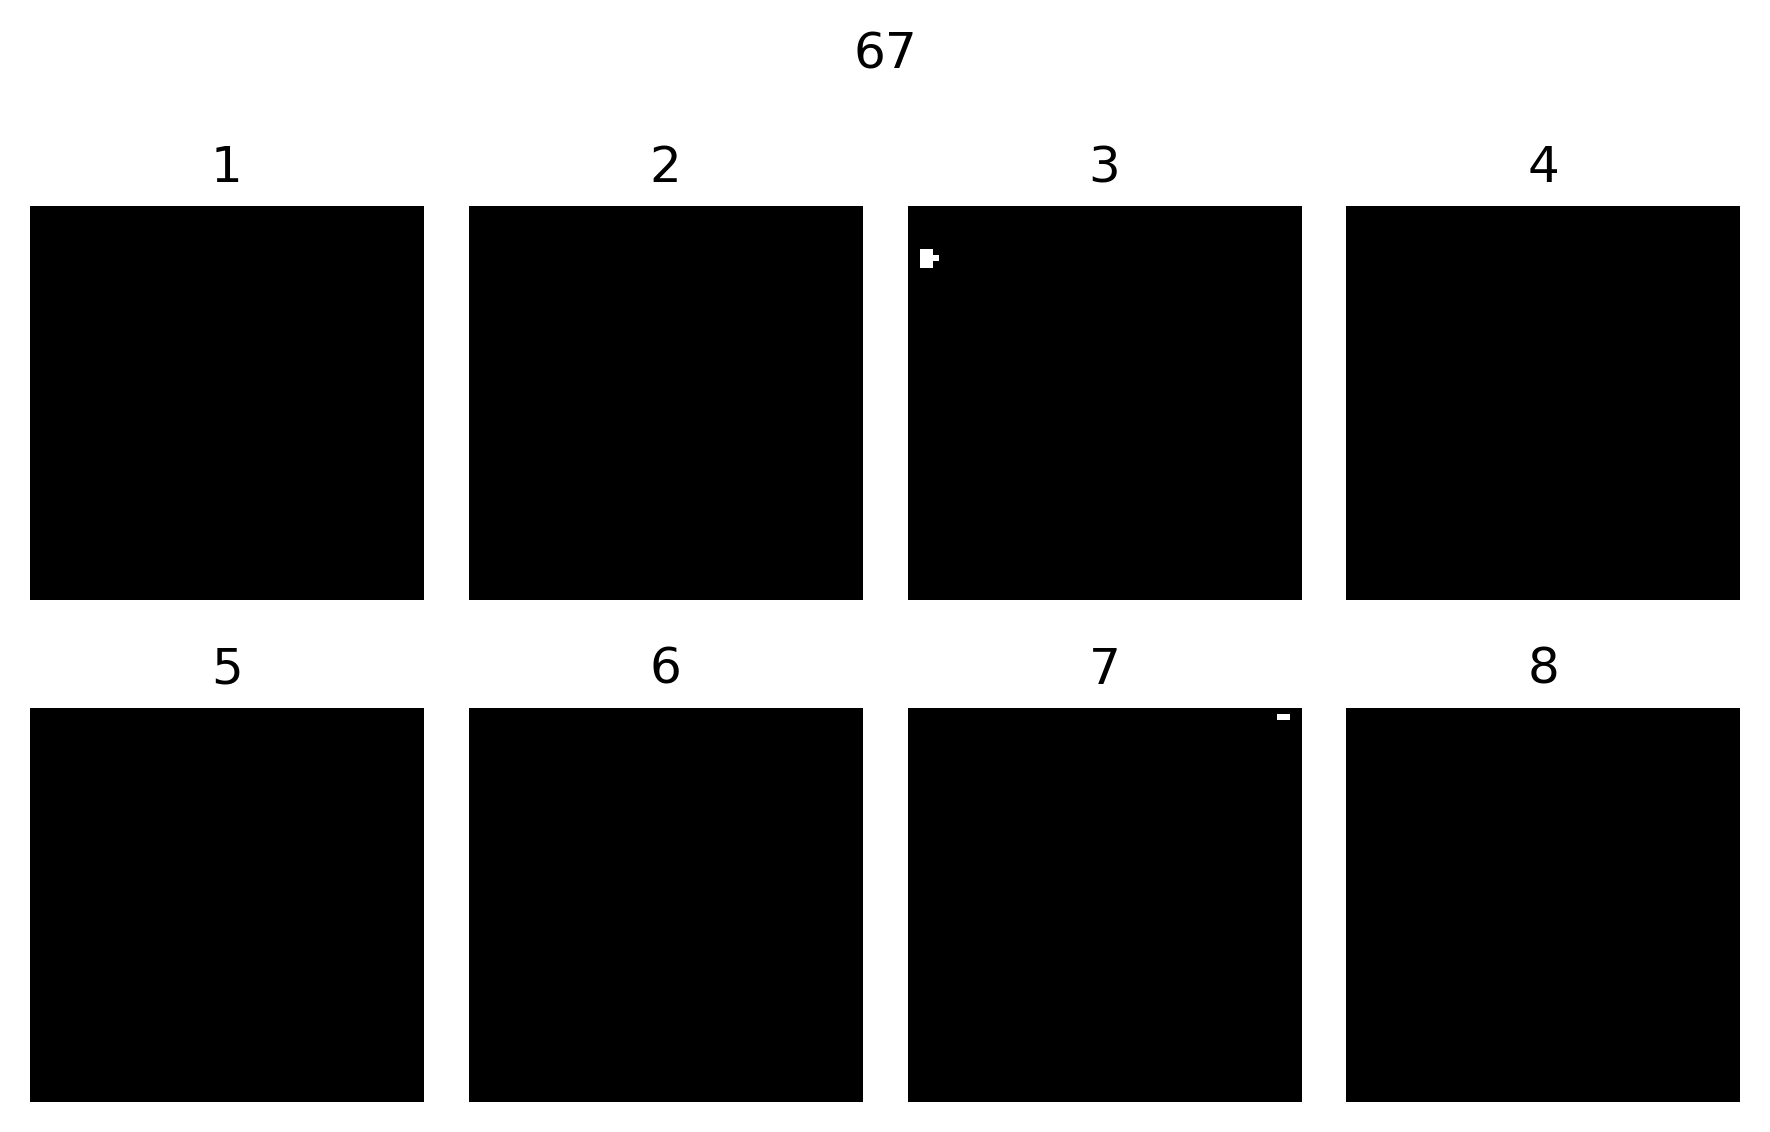

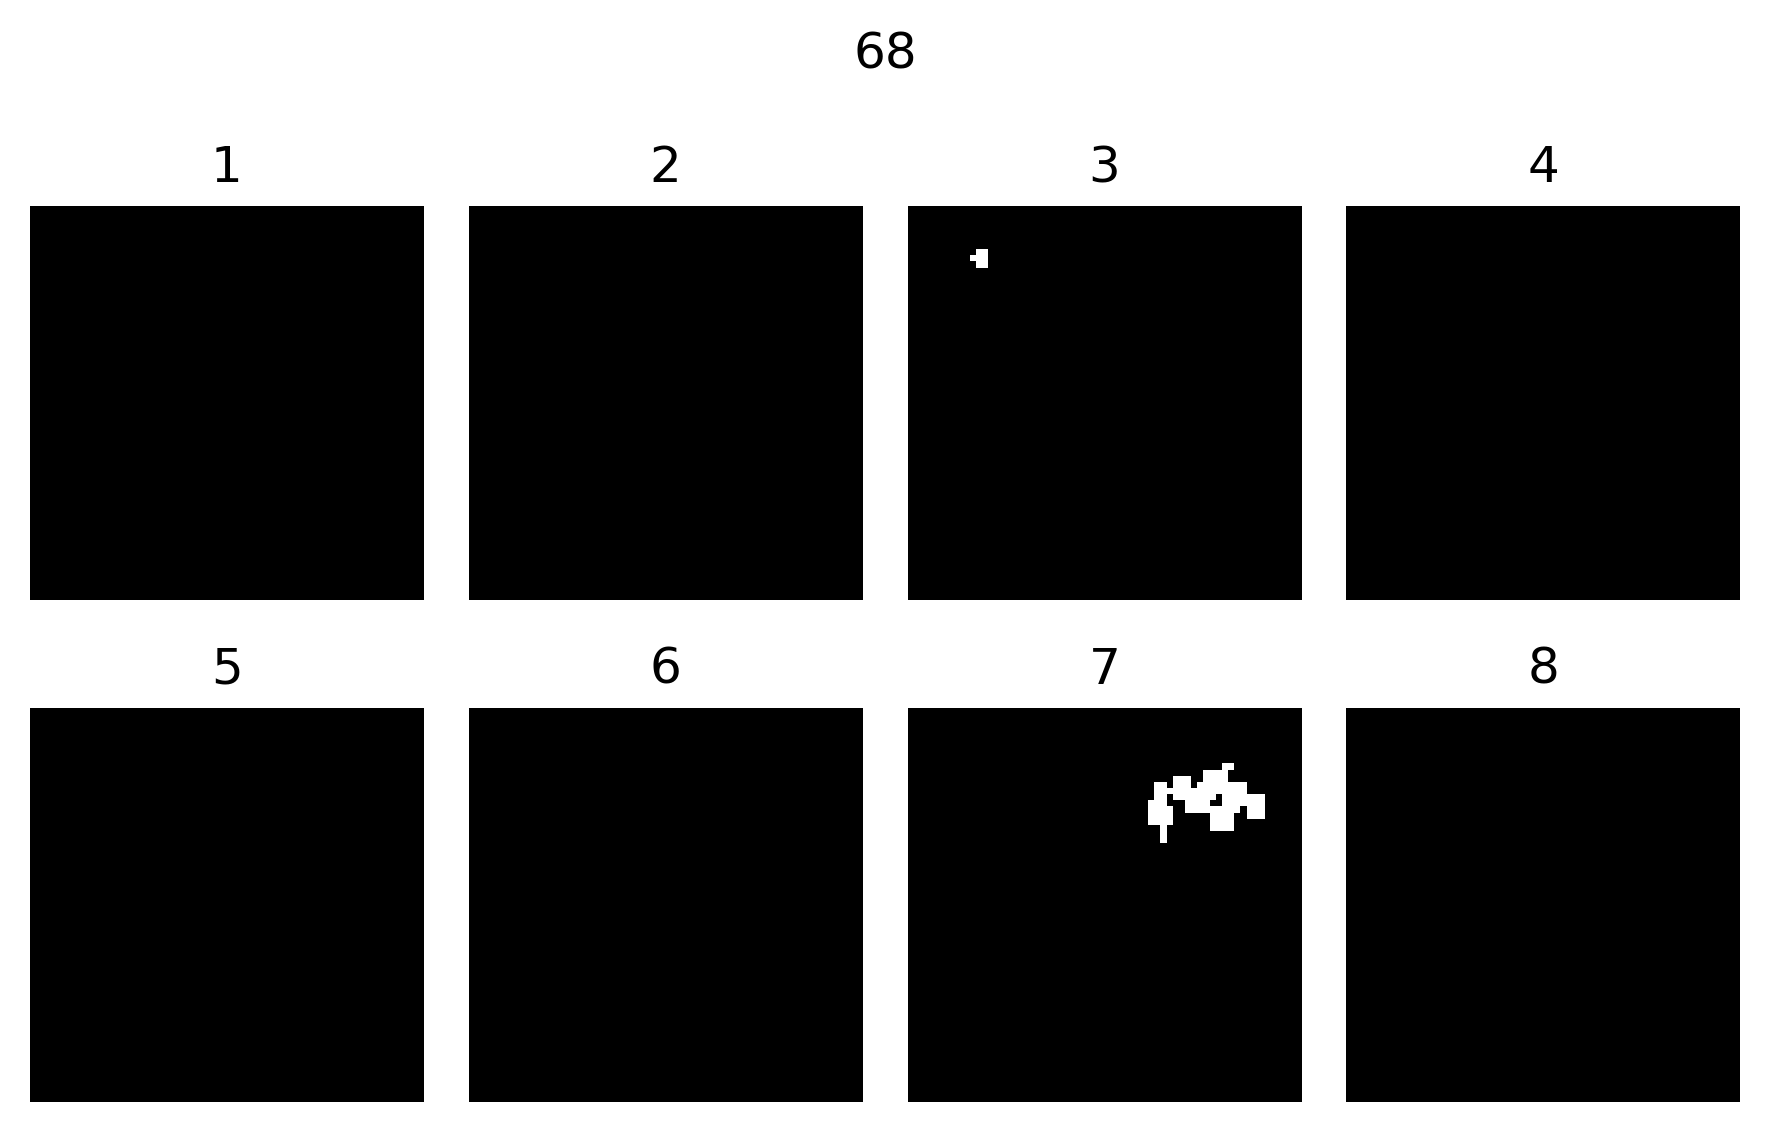

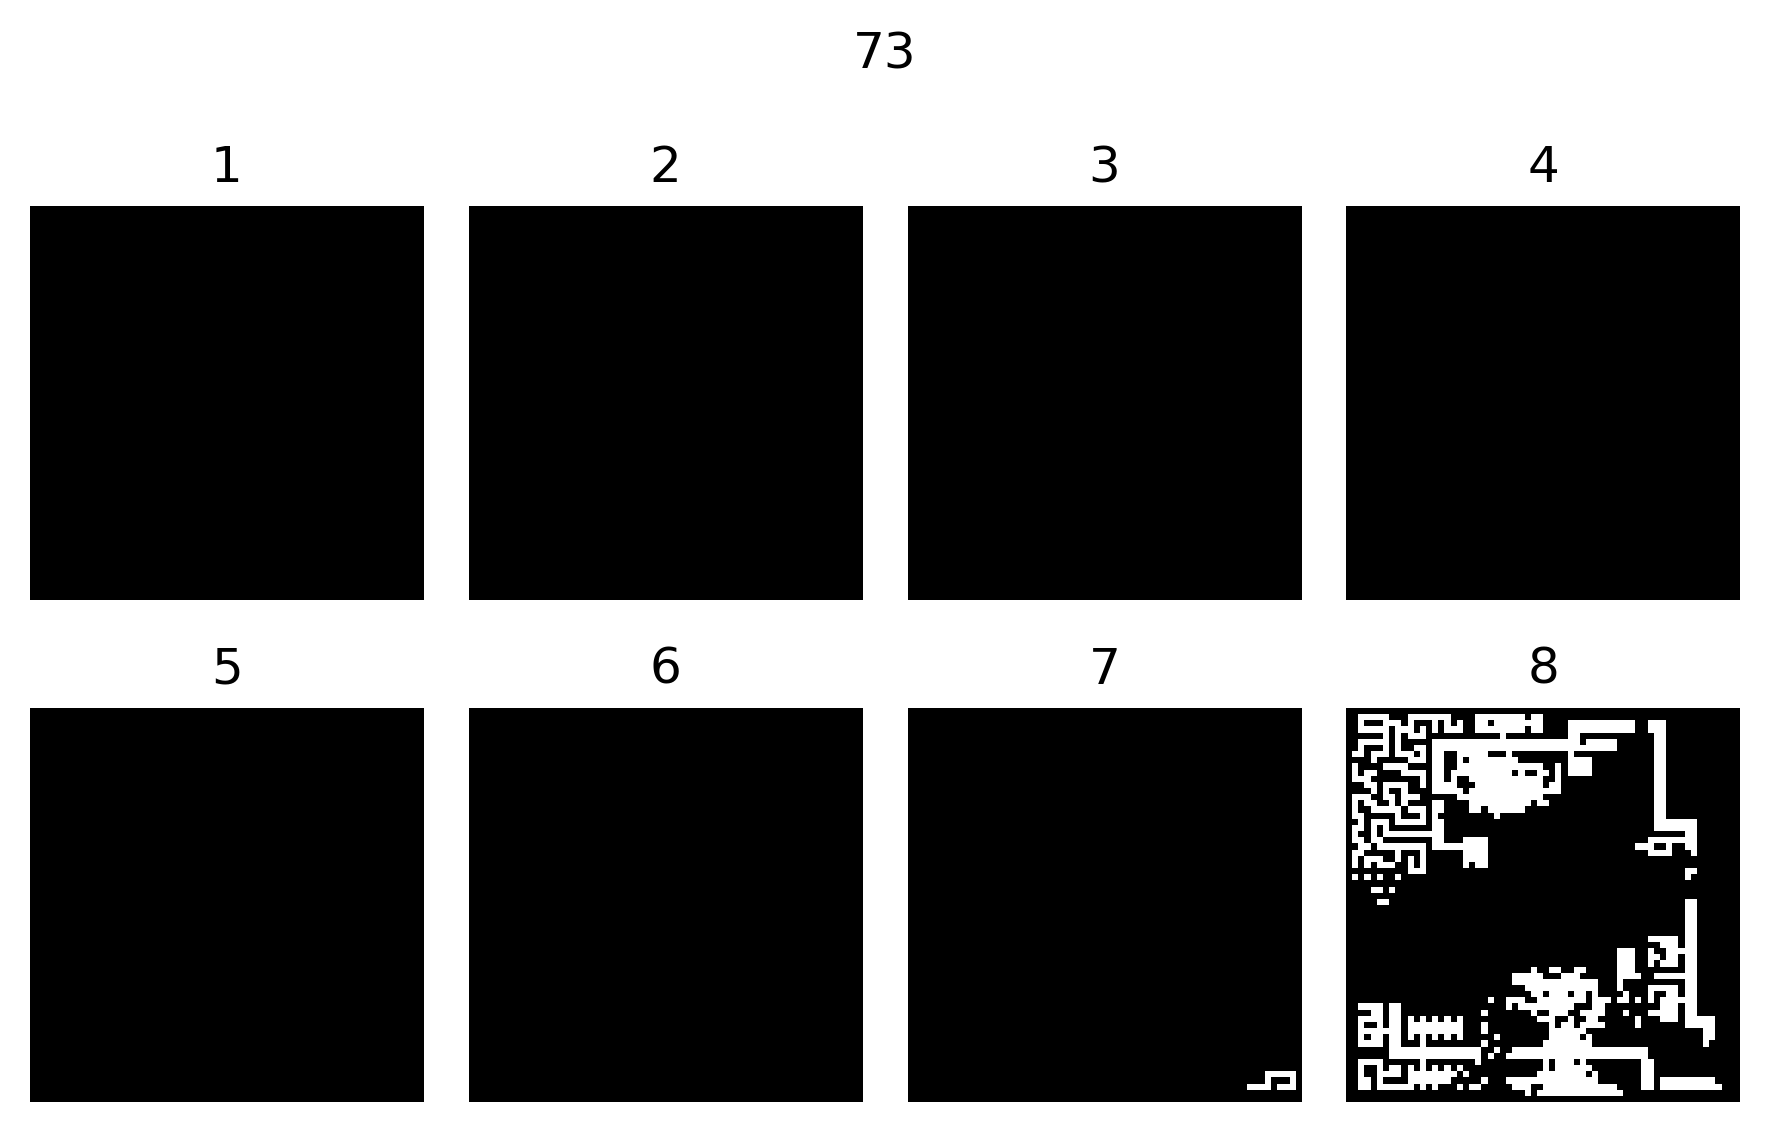

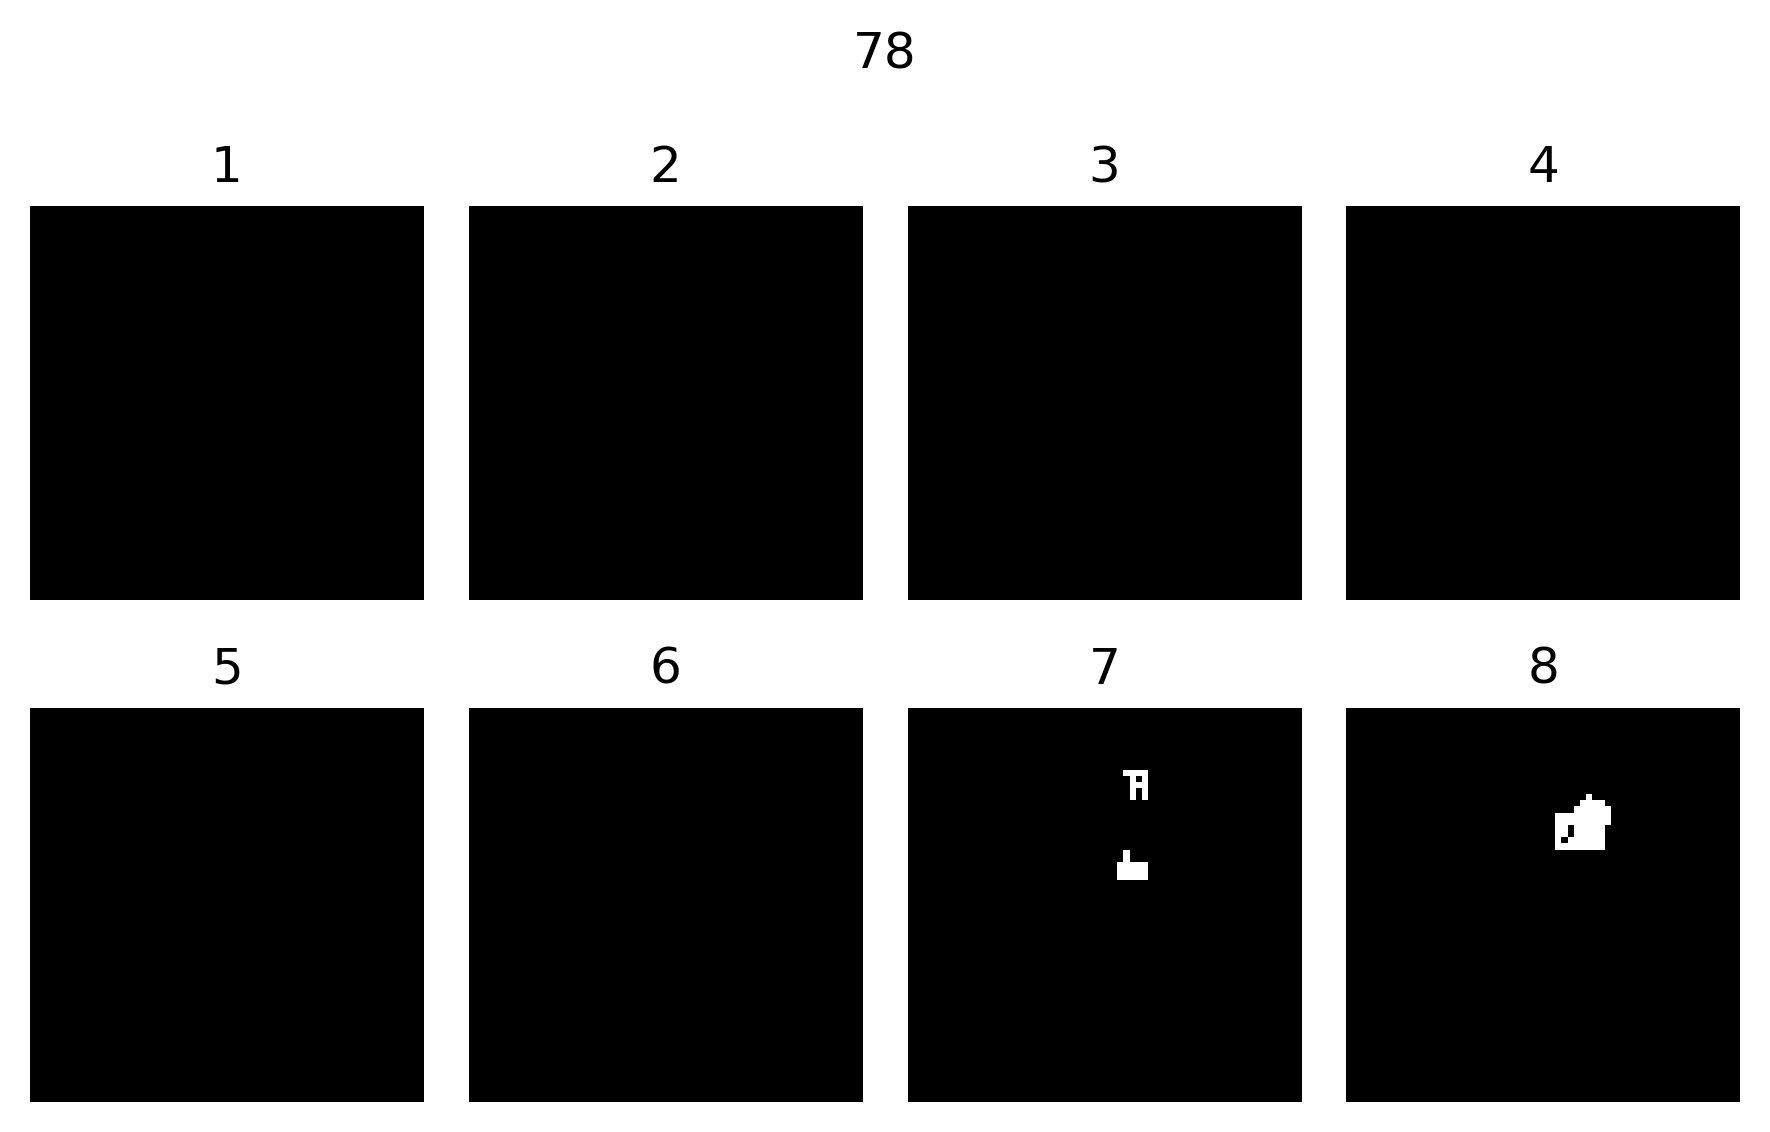

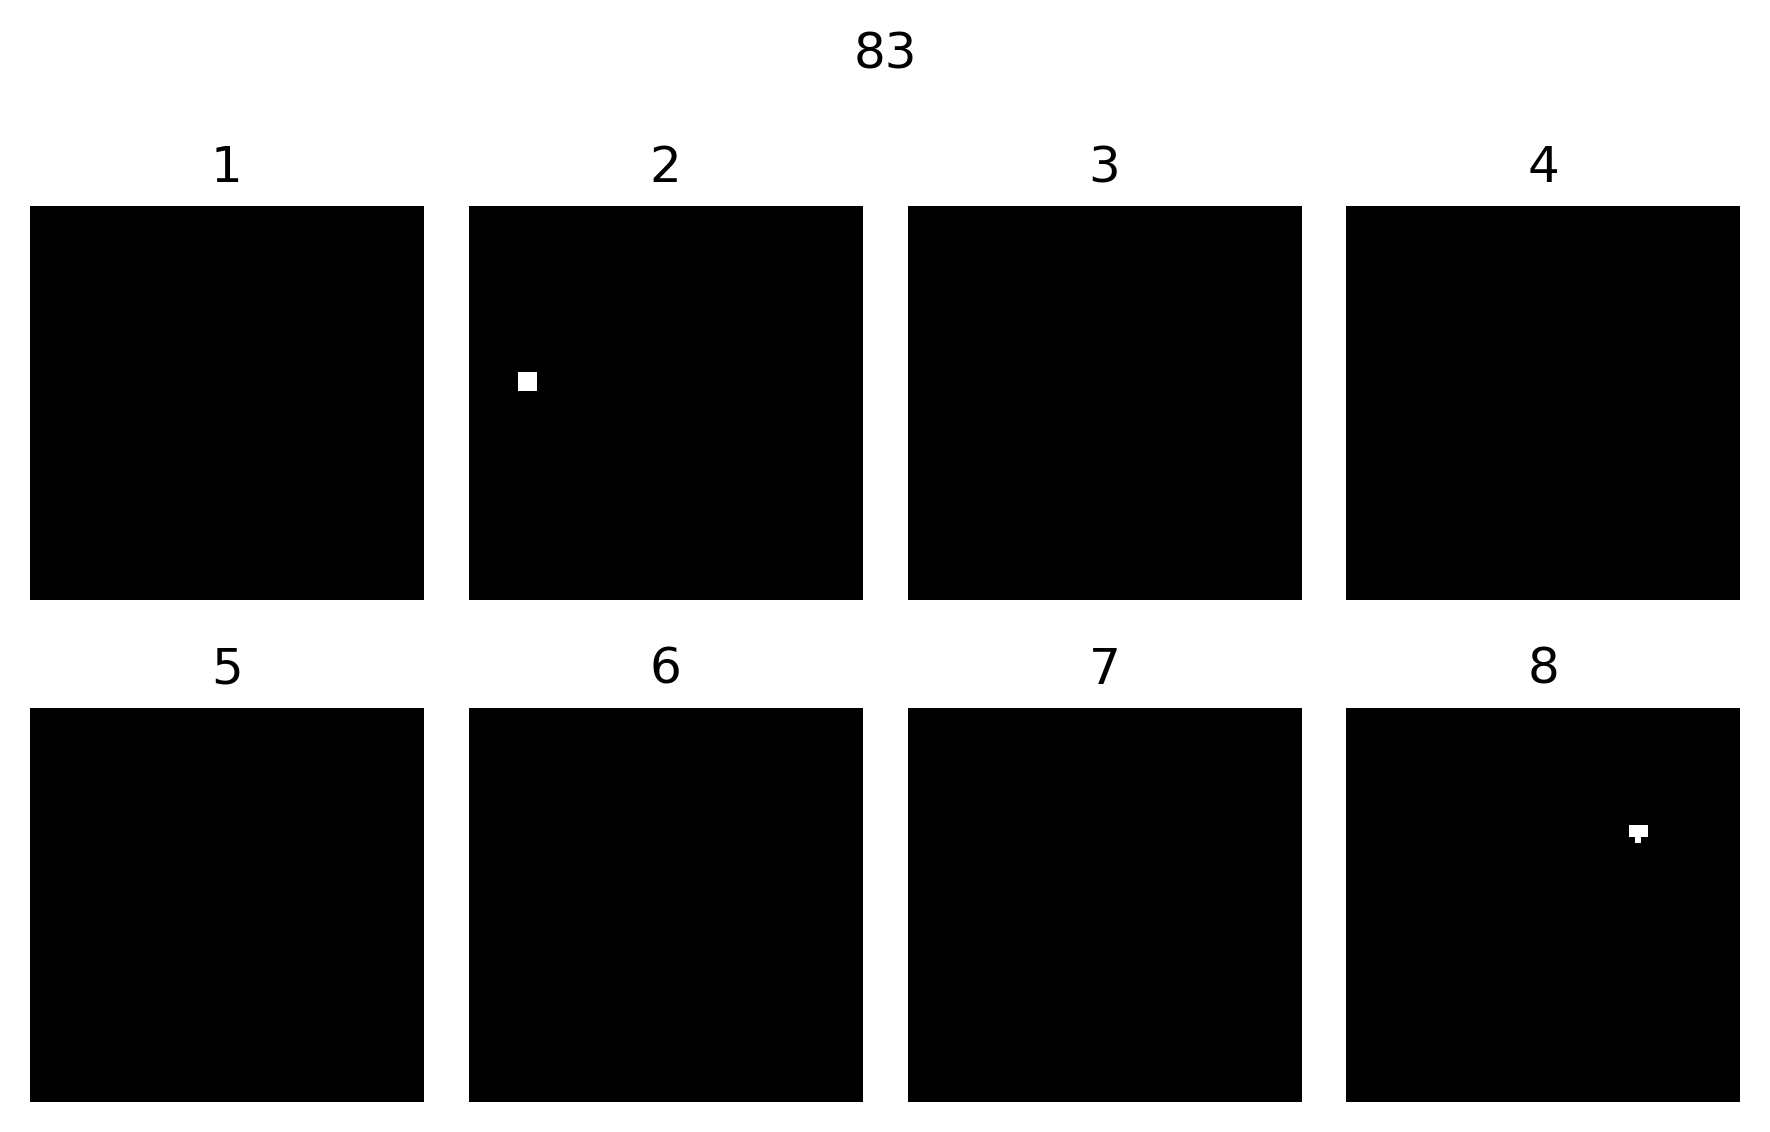

In [183]:
# weird_to_test = [67, 68, 83]
for label_span in spans_levels:
    fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(6, 4), dpi=300)
    axs = axs.flatten()
    for i, (layer, ax) in enumerate(zip(images, axs)):
        ax.imshow(layer == label_span, cmap='gray')
        ax.set_title(i+1)
        ax.axis('off')
    fig.suptitle(label_span)
    fig.tight_layout()